In [ ]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# %matplotlib widget
%matplotlib inline

In [209]:
svec = loadtxt("../Data/3x3-0p/cell")
rvec = svec/3

n_nb=loadtxt("../Data/3x3-0p/nb")
n_se=loadtxt("../Data/3x3-0p/se")
m_nb=loadtxt("../Data/3x3-0p-p1/nb")
m_se=loadtxt("../Data/3x3-0p-p1/se")

n_atom = dot(concatenate([n_nb,n_se]),svec)
n_atom = n_atom-n_atom[0]
m_atom = dot(concatenate([m_nb,m_se]),svec)
m_atom = m_atom-(m_atom[0]-n_atom[0])
m_atom = m_atom -average(m_atom[:9]-n_atom[:9],axis=0)

nb=array([n_nb,m_nb])
nb[0] = dot(nb[0],svec)
nb[1] = dot(nb[1],svec)

se=array([n_se,m_se])
se[0] = dot(se[0],svec)
se[1] = dot(se[1],svec)

# se[0] = se[0]-(nb[0][0]-nb[1][0])
# nb[0] = nb[0]-(nb[0][0]-nb[1][0])

nb_x, nb_y, nb_z = nb.T[0].T, nb.T[1].T, nb.T[2].T
se_x, se_y, se_z = se.T[0].T, se.T[1].T, se.T[2].T


b = 4*pi/(linalg.norm(rvec[0])*sqrt(3))
qvec = b*array([[-sqrt(3)/2,-1/2,0],[0,1,0],[sqrt(3)/2,-1/2,0]])/3
qdif = array([[qvec[0]-qvec[1],qvec[1]-qvec[2],qvec[2]-qvec[0]]])
qdif= qdif[0]
qunit = qvec/abs(linalg.norm(qvec[0]))



u = m_atom - n_atom

# u = u- average(u,axis=0)




In [210]:
def plot_lattice():
    fig = plt.figure(figsize=(10,10))
    s1, s2 = 200,300
    hw=0.2
    cell_color="black"
    cell_lw=4
    cell_zorder=0
    plt.scatter(0,0,c="blue",s=s2,label="Nb")
    plt.scatter(0,0,c="green",s=s1,label="Se")    
    period = arange(-2,3,1)
    for i in period:
        for j in period:
            plt.scatter(n_atom[:9].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:9].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[9:17].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[9:17].T[1]+(i*svec[0][1]+j*svec[1][1]),c="green",s=s1,zorder=2)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            for k in [0,1,8]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
            for k in [3,6,7]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
            for k in [2,4,5]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
    plt.xlim(-12,12)
    plt.ylim(-12,12)
    plt.xticks([])
    plt.yticks([])
#     plt.axis("equal")
    plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)
#     plt.savefig("3x3_lattice_c3.pdf",bbox_inches='tight')
    # plt.axis("equal")
#     plt.show()

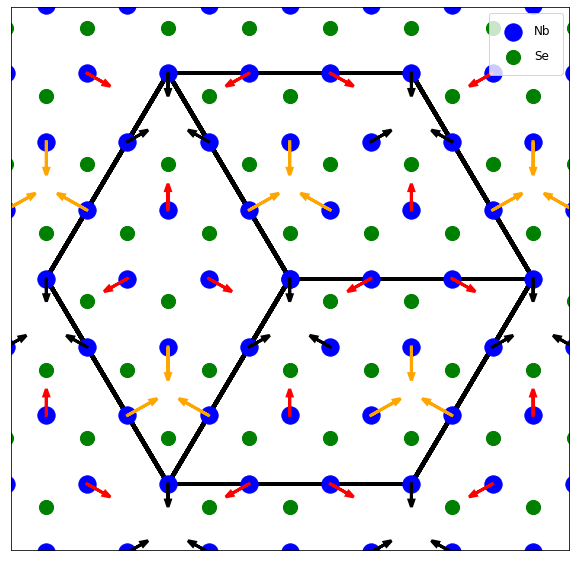

In [211]:
plot_lattice()

In [212]:
sum(u[:9],axis=0)

array([-6.66133815e-16, -1.05471187e-15,  0.00000000e+00])

In [213]:
for i in u:
    print(norm(i))

0.07188872013994654
0.07192897042243174
0.11767958265435485
0.08588072413789902
0.11761876661454089
0.11785697753967263
0.08576369472835946
0.08596566061516923
0.0719856954229406
0.23405969242275723
0.23407794473315272
0.2659834144533481
0.23407456518420083
0.16394708766319852
0.16392375972927373
0.2659833949780761
0.16394395024356345
0.26598081015298963
0.23405866899709002
0.2340771260571882
0.26598258285527254
0.23407374651268922
0.1639460493654116
0.1639229289833953
0.2659825633812434
0.1639431195862686
0.26597997854872446


In [196]:
u

array([[ 3.70450888e-05, -7.18887106e-02,  0.00000000e+00],
       [-6.23716332e-02,  3.58267520e-02,  0.00000000e+00],
       [ 1.01933226e-01,  5.88056254e-02,  0.00000000e+00],
       [-7.44900557e-02, -4.27402665e-02,  0.00000000e+00],
       [-1.01864422e-01,  5.88031779e-02,  0.00000000e+00],
       [ 3.33812889e-05, -1.17856973e-01,  0.00000000e+00],
       [ 7.43552046e-02, -4.27400852e-02,  0.00000000e+00],
       [-7.08799911e-05,  8.59656314e-02,  0.00000000e+00],
       [ 6.24381341e-02,  3.58248484e-02,  0.00000000e+00],
       [-3.63583059e-02,  2.08761909e-02, -2.30274180e-01],
       [ 7.05950289e-05, -4.20282903e-02, -2.30273972e-01],
       [-8.88514295e-03, -4.83305373e-03, -2.65791032e-01],
       [ 3.64878241e-02,  2.08697548e-02, -2.30269395e-01],
       [-8.66673009e-03,  5.06728439e-03, -1.63639414e-01],
       [-3.91619511e-05, -9.68609300e-03, -1.63637334e-01],
       [-3.24624311e-05,  1.01249173e-02, -2.65790616e-01],
       [ 8.59107553e-03,  5.07444574e-03

In [197]:
def uToQ(supercell,q,disp):
    return dot(exp(-1j*dot(supercell,q.T)).T,u)

In [198]:
utilde = uToQ(n_atom,qvec,u)

In [200]:
for i in utilde:
    print(norm(i))

0.40317472340583665
0.40062077611849234
0.40397677790386083


In [201]:
linalg.norm(qvec[0])/linalg.norm(utilde[2])

1.7156516873731233

In [202]:
for i in real(utilde):
    print(norm(i))

0.06478445920256351
0.06334979422700944
0.3779362296172006


In [203]:
for i in imag(utilde):
    print(norm(i))

0.39793571269641564
0.39558034560526223
0.14269352973530344


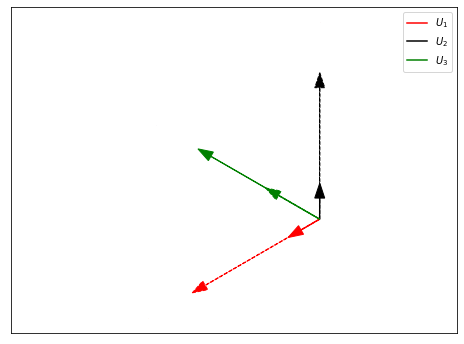

In [204]:
fig = plt.figure(figsize=(8,6))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green"]
    
for i in range(3):
    plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.03,color=colors[i],ls="-",lw=1)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.03,color=colors[i],ls="--",lw=1)
    plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))
    
# for i in real(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="black")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)
    
# for i in imag(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="red")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)


# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis("equal")    
plt.show()

In [208]:
sum(exp(-1j*dot(n_atom[:9],qdif.T)),axis=0)

array([-1.19201445e-06-4.40282860e-07j,  5.88886489e-07-1.56598030e-07j,
        5.89192136e-07+5.96522661e-07j])

In [206]:
rvec

array([[ 3.48933333,  0.        ,  0.        ],
       [-1.74466667,  3.02166667,  0.        ],
       [ 0.        ,  0.        ,  6.935     ]])

In [207]:
n_atom[:9]

array([[ 3.48939715e+00, -6.04381680e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.74469910e+00, -3.02190378e+00,  0.00000000e+00],
       [ 6.97880148e+00, -6.04381725e+00,  0.00000000e+00],
       [ 5.23410049e+00, -3.02190133e+00,  0.00000000e+00],
       [ 3.48940082e+00,  1.26910000e-06,  0.00000000e+00],
       [ 1.04682018e+01, -6.04381743e+00,  0.00000000e+00],
       [ 8.72350508e+00, -3.02190260e+00,  0.00000000e+00],
       [ 6.97880190e+00,  1.90365000e-06,  0.00000000e+00]])

In [190]:
svec

array([[10.468,  0.   ,  0.   ],
       [-5.234,  9.065,  0.   ],
       [ 0.   ,  0.   , 20.805]])